# 统计分析方法

## t检验
T检验根据应用情况不同，可以分为单样本T检验、独立样本T检验和配对样本T检验。
### 单样本t检验
单样本T检验就是要利用来自某总体的样本数据，推断该总体的均值和指定的检验值之间是否存在显著性差异。它是对总体均值的假设检验。  
**检验条件**：
- 单组观测变量为连续变量
- 样本中的观测值都是独立的
- 单组连续变量无明显异常值，该条非常重要
- 服从或近视服从正态分布
  
例：政府要求排放量低于20ppm，公司制作出10台样品测试，每台的排放量如下：

| 15.6 | 16.2 | 22.5 | 20.5 | 16.4 | 19.4 | 16.6 | 17.9 | 12.7 | 13.9 |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |

In [9]:
from scipy import stats
list = [15.6,16.2,22.5,20.5,16.4,19.4,16.6,17.9,12.7,13.9]
# 该函数的第二个参数为假定的总体均值，因此这里为20
print(stats.ttest_1samp(list,popmean=20))
# stats.ttest_1samp函数的结果是双尾检验，题目要求的是小于20，因此为单尾检验，概率为双尾的一般（对称性）
# 实际p值
print("实际p值：{}".format(stats.ttest_1samp(list,popmean=20)[1]/2))

Ttest_1sampResult(statistic=-3.001649525885985, pvalue=0.014916414248897527)
实际p值：0.0074582071244487635


### 两样本的t检验
同样的两组数据，根据它们之间关系的不同，可以分为独立样本或配对样本，独立样本（成组t检验）和配对样本对应的T检验的自由度是不同的，这是它们作T检验最大的区别。
#### 独立样本t检验
独立样本t检验也就是说两组样本来自不同的总体，判断这两个总体是否相同。   
**独立样本t检验的条件：**
- 两组观测变量均为连续变量
- 连续观测值之间相互独立
- 两组观测变量不存在明显异常值
- 两组连续变量**分别**近似或服从正态分布
- 两组观测变量的方差相等

例：考试成绩是否与性别有关？
假设一个班的成绩如下：

| 男  | 女  |
|----|----|
| 90 | 91 |
| 92 | 92 |
| 98 | 87 |
| 88 | 89 |
| 76 | 89 |
| 59 | 87 |
| 89 | 94 |
| 88 | 95 |
| 93 | 78 |
| 90 | 87 |
| 90 |  |

判断男女的成绩是否有差异？

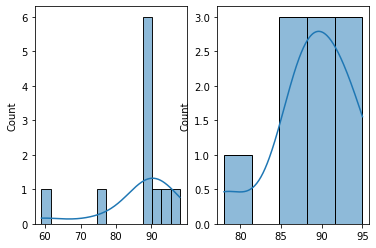

LeveneResult(statistic=0.5516842935873632, pvalue=0.466715089057658)


In [53]:
from scipy import stats
import pandas as pd 

s1 = pd.Series([90,92,98,88,76,59,89,88,93,90,90])
s2 = pd.Series([91,92,87,89,90,87,94,95,78,87])

# 在分析之前，先看看这两组数据的分布情况
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
sns.histplot(s1,kde=True)
plt.subplot(1,2,2)
sns.histplot(s2,kde=True)
plt.show()
# 方差齐性检验
print(stats.levene(s1,s2))

In [54]:
# 独立样本t检验
stats.ttest_ind(s1,s2)

Ttest_indResult(statistic=-0.6474154967227954, pvalue=0.5251090704708516)

#### 配对样本t检验
配对样本t检验也就是说两组样本是高度关联的，两者之间互相影响的。  
例：考察某种教学方法对学生成绩的影响，使用新型教学方法前后，同一个班级学生成绩的变化等。**这里和平时常用的独立样本t检验不同的是使用方法前后，作用的是同一批学生。**  
配对t检验的使用条件：
- 数据是连续分布的
- 数据的差值，也就是两组数据的差值是大致服从正态分布的

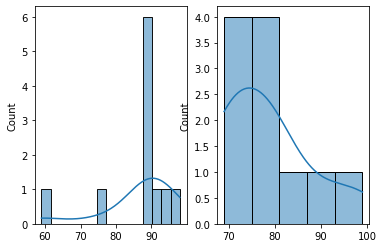

LeveneResult(statistic=0.15624999999999992, pvalue=0.6968172506152768)


In [57]:
from scipy import stats
import pandas as pd 

s1 = pd.Series([90,92,98,88,76,59,89,88,93,90,90])
s2 = pd.Series([79,92,99,76,79,69,70,69,70,77,83])

# 在分析之前，先看看这两组数据的分布情况
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
sns.histplot(s1,kde=True)
plt.subplot(1,2,2)
sns.histplot(s2,kde=True)
plt.show()
# 方差齐性检验
print(stats.levene(s1,s2))

In [58]:
# 配对样本t检验
stats.ttest_rel(s1,s2)

Ttest_relResult(statistic=2.5783838025954435, pvalue=0.027492425689388224)